<a href="https://colab.research.google.com/github/amrish1222/DL_pytorch_classification/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install torch torchvision

In [0]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [0]:
transforms = transforms.Compose([transforms.Resize((28,28)),
                                 transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))
                               ])

training_dataset = datasets.MNIST(root = './data', train = True, download = True, transform = transforms)
validation_dataset = datasets.MNIST(root = './data', train = False, download = True, transform = transforms)

training_loader = torch.utils.data.DataLoader(dataset = training_dataset, batch_size = 100, shuffle = True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle = False)

In [0]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image * np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

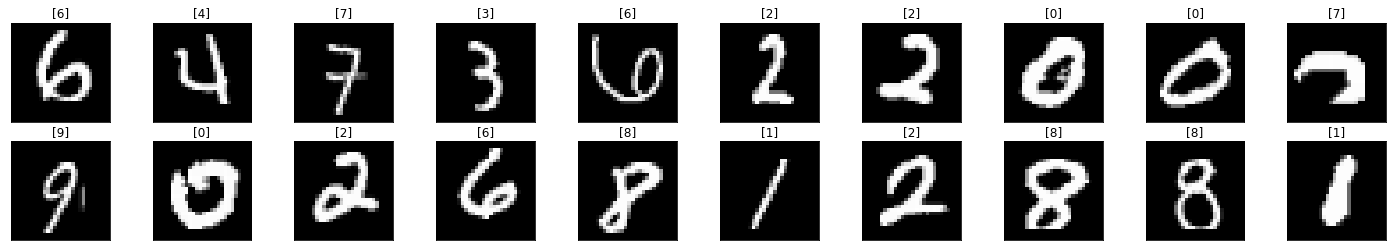

In [0]:
data_iter = iter(training_loader)
images, labels = data_iter.next()
fig = plt.figure(figsize = (25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2,10,idx+1, xticks = [], yticks = [])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])
  

In [0]:
class Classifier(nn.Module):

  def __init__(self, input_dims, h1_dims, h2_dims, output_dims):
    super().__init__()
    self.linear1 = nn.Linear(input_dims, h1_dims)
    self.linear2 = nn.Linear(h1_dims, h2_dims)
    self.linear3 = nn.Linear(h2_dims, output_dims)

  def forward(self, X):
    x = F.relu(self.linear1(X))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [0]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)

In [0]:
epochs = 20
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []
 
for e in range(epochs):
  
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0
  
  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
 
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)
        
        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)
      
    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/ len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    
    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/ len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))

epoch : 1
training loss: 0.9452, acc 78.5083 
validation loss: 0.4132, validation acc 88.9600 
epoch : 2
training loss: 0.3704, acc 89.5800 
validation loss: 0.3141, validation acc 91.0100 
epoch : 3
training loss: 0.3101, acc 91.0183 
validation loss: 0.2793, validation acc 91.8200 
epoch : 4
training loss: 0.2780, acc 91.9600 
validation loss: 0.2559, validation acc 92.5600 
epoch : 5
training loss: 0.2532, acc 92.6083 
validation loss: 0.2428, validation acc 93.0400 
epoch : 6
training loss: 0.2319, acc 93.2517 
validation loss: 0.2175, validation acc 93.6100 
epoch : 7
training loss: 0.2131, acc 93.8867 
validation loss: 0.2099, validation acc 93.8700 
epoch : 8
training loss: 0.1983, acc 94.2650 
validation loss: 0.1885, validation acc 94.4000 
epoch : 9
training loss: 0.1839, acc 94.6733 
validation loss: 0.1796, validation acc 94.5400 
epoch : 10
training loss: 0.1720, acc 95.0217 
validation loss: 0.1704, validation acc 94.8500 
epoch : 11
training loss: 0.1616, acc 95.3200 
va

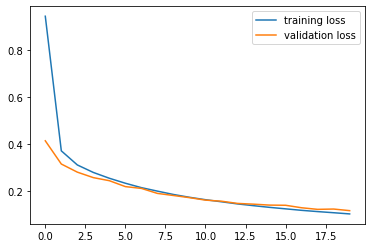

In [0]:
plt.plot(running_loss_history, label = 'training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

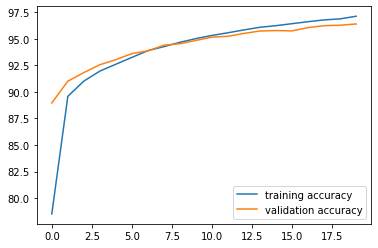

In [0]:
plt.plot(running_corrects_history, label = 'training accuracy')
plt.plot(val_running_corrects_history, label = 'validation accuracy')
plt.legend()

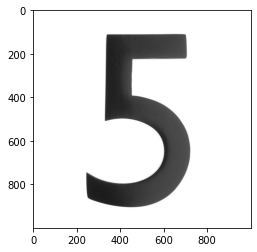

In [0]:
import requests
from PIL import Image
import PIL
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)


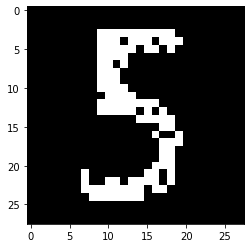

In [0]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transforms(img)
plt.imshow(im_convert(img))

In [0]:
img = img.view(img.shape[0],-1)
output = model(img)
_,pred = torch.max(output,1)
print(pred.item())

5


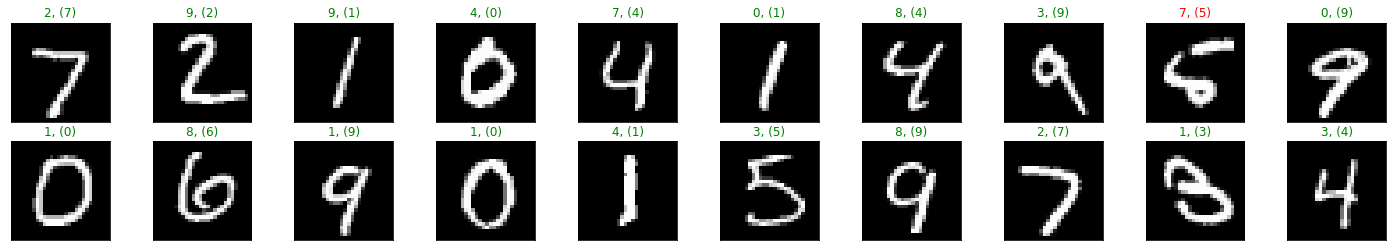

In [0]:
data_iter = iter(validation_loader)
images, labels = data_iter.next()
images_ = images.view(images.shape[0],-1)
output = model(images_)
_, pred = torch.max(output,1)
fig = plt.figure(figsize = (25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2,10,idx+1, xticks = [], yticks = [])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{}, ({})".format(str(preds[idx].item()), str(labels[idx].item())), color = ("green" if pred[idx] == labels[idx] else"red"))